# Predicting if a Crash wll be fatal or not

Here we will be predicting if a crash will be fatal or not

Steps: 
1. Create 2 new dfs 
    - df with only fatal crashes
    - data frame that samples all non fatal crashes from original df
2. Concat both dfs
3. New columns with 0 (non-fatal crash) or 1 (fatal crash)
4. Clean up data and make dummy variables for each crash
5. Try ML 

Columns to use for ML
### Columns to use for ML
- 'Road Grade', 
- 'Collision Type', 
- 'Weather', 
- 'Surface Condition', 
- 'Driver Substance Abuse', 
- 'Road Condition', 
- 'Fixed Objec Struck', 
- 'Junction', 
- 'Intersection Type', 
- 'Road Alignment', 
- 'Road Division',
- 'Traffic Control',
- 'Number of Lanes'

### Columns to delete
- 'Report Number', 
- 'Local Case Number', 
- 'Agency Name', 
- 'Mile Point', 
- 'Mile Point Direction', 
- 'Lane Direction', 
- 'Direction', 
- 'Distance', 
- 'Distance Unit', 
- 'Road Name', 
- 'Off-Road Description', 
- 'First Harmful Event', 
- 'Latitude', 
- 'Longitude', 
- 'Location', 

In [1]:
# import libraries 

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# reading in data 
data = pd.read_csv('data/00-crash_reporting_incidents.csv', low_memory = False)
data.shape

(47592, 44)

In [5]:
data['Collision Type'].unique().tolist()

['SAME DIRECTION SIDESWIPE',
 'OPPOSITE DIRECTION SIDESWIPE',
 'SAME DIRECTION LEFT TURN',
 'OTHER',
 'SAME DIR REAR END',
 'SINGLE VEHICLE',
 'UNKNOWN',
 'HEAD ON LEFT TURN',
 'STRAIGHT MOVEMENT ANGLE',
 'SAME DIRECTION RIGHT TURN',
 'ANGLE MEETS LEFT TURN',
 'HEAD ON',
 nan,
 'SAME DIR REND LEFT TURN',
 'ANGLE MEETS RIGHT TURN',
 'ANGLE MEETS LEFT HEAD ON',
 'SAME DIR REND RIGHT TURN',
 'OPPOSITE DIR BOTH LEFT TURN',
 'SAME DIR BOTH LEFT TURN']

In [72]:
# create new y column 'Fatal' 
data['Fatal'] = ""

# fill new column using factorize method, to turning category into int
data['Fatal'] = data['ACRS Report Type'].factorize()[0]

In [73]:
print(data['Fatal'].value_counts())
print(data['ACRS Report Type'].value_counts())

0    30442
1    17031
2      119
Name: Fatal, dtype: int64
Property Damage Crash    30442
Injury Crash             17031
Fatal Crash                119
Name: ACRS Report Type, dtype: int64


In [74]:
data['Road Condition'] = data['Road Condition'].factorize()[0]
data['Road Alignment'] = data['Road Alignment'].factorize()[0]

# Decision Tree Classifier Using 2 Features

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [76]:
feature_cols = ['Road Condition', 'Road Alignment']

X = data[feature_cols]
y = data.Fatal

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.2,
                                                    stratify = y, 
                                                   random_state = 3)

In [78]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 1)

In [79]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [80]:
y_pred = dt.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred)

0.6400882445635045

In [82]:
# gives us the importance of each feature
ft_importance

array([0.05353844, 0.94646156])

In [83]:
# zips the feature importance to the feature cols
list(zip(feature_cols, dt.feature_importances_))

[('Road Condition', 0.05353843927955279),
 ('Road Alignment', 0.9464615607204472)]

# Decision Tree Classifier using More Features

In [226]:
data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Mile Point',
       'Mile Point Direction', 'Lane Direction', 'Lane Number', 'Lane Type',
       'Number of Lanes', 'Direction', 'Distance', 'Distance Unit',
       'Road Grade', 'NonTraffic', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck',
       'Junction', 'Intersection Type', 'Intersection Area', 'Road Alignment',
       'Road Condition', 'Road Division', 'Latitude', 'Longitude', 'Location',
       'Fatal', 'Surface Conditin', 'Driver Substanc Abuse'],
      dtype='object')

In [227]:
data['Hit/Run'].value_counts()

No     39484
Yes     8108
Name: Hit/Run, dtype: int64

In [228]:
data['Road Grade'] = data['Road Grade'].factorize()[0]
data['Collision Type'] = data['Collision Type'].factorize()[0]
data['Weather'] = data['Weather'].factorize()[0]
data['Surface Condition'] = data['Surface Condition'].factorize()[0]
data['Driver Substance Abuse'] = data['Driver Substance Abuse'].factorize()[0]
data['Road Condition'] = data['Road Condition'].factorize()[0]
data['Junction'] = data['Junction'].factorize()[0]
data['Intersection Type'] = data['Intersection Type'].factorize()[0]
data['Road Alignment'] = data['Road Alignment'].factorize()[0]
data['Road Division'] = data['Road Division'].factorize()[0]
data['Traffic Control'] = data['Traffic Control'].factorize()[0]
data['Number of Lanes'] = data['Number of Lanes'].factorize()[0]

In [229]:
feature_cols = ['Road Grade',
                'Collision Type',
                'Weather',
                'Surface Condition',
                'Driver Substance Abuse',
                'Road Condition',
                'Junction',
                'Intersection Type',
                'Road Alignment',
                'Road Division',
                'Traffic Control',
                'Number of Lanes']

X = data[feature_cols]
y = data.Fatal

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.2,
                                                    stratify = y, 
                                                   random_state = 3)

In [231]:
dt = DecisionTreeClassifier()

In [232]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [233]:
accuracy_score(y_test, y_pred)

0.6400882445635045

In [234]:
# gives us the importance of each feature
dt.feature_importances_

array([0.08564666, 0.12695432, 0.10422648, 0.05599531, 0.07330386,
       0.0349244 , 0.10378152, 0.08534049, 0.05059808, 0.0842183 ,
       0.08260674, 0.11240385])

In [235]:
# zips the feature importance to the feature cols
feature_important = list(zip(feature_cols, dt.feature_importances_))

# turns feature_importances list into df
feature_important = pd.DataFrame(feature_important)

# to get percents from the decimals
feature_important[1] = round(feature_important[1] * 100, 2)

#print feature_importances
print(feature_important)

                         0      1
0               Road Grade   8.56
1           Collision Type  12.70
2                  Weather  10.42
3        Surface Condition   5.60
4   Driver Substance Abuse   7.33
5           Road Condition   3.49
6                 Junction  10.38
7        Intersection Type   8.53
8           Road Alignment   5.06
9            Road Division   8.42
10         Traffic Control   8.26
11         Number of Lanes  11.24


<Figure size 864x720 with 0 Axes>

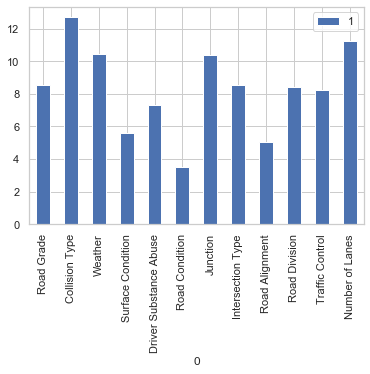

<Figure size 864x720 with 0 Axes>

In [236]:
feature_important.plot.bar(0, 1)
plt.figure(figsize = (12, 10))

In [242]:
from sklearn.metrics import confusion_matrix

In [250]:
confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

array([[6088,    1,    0],
       [3401,    5,    0],
       [  24,    0,    0]], dtype=int64)

In [ ]:
sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)[source]

In [254]:
y_pred.shape

(9519,)

In [260]:
y_test.shape

(9519,)